In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../insurance.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


## Scatter Plot of In-dependent variable with dependent variable

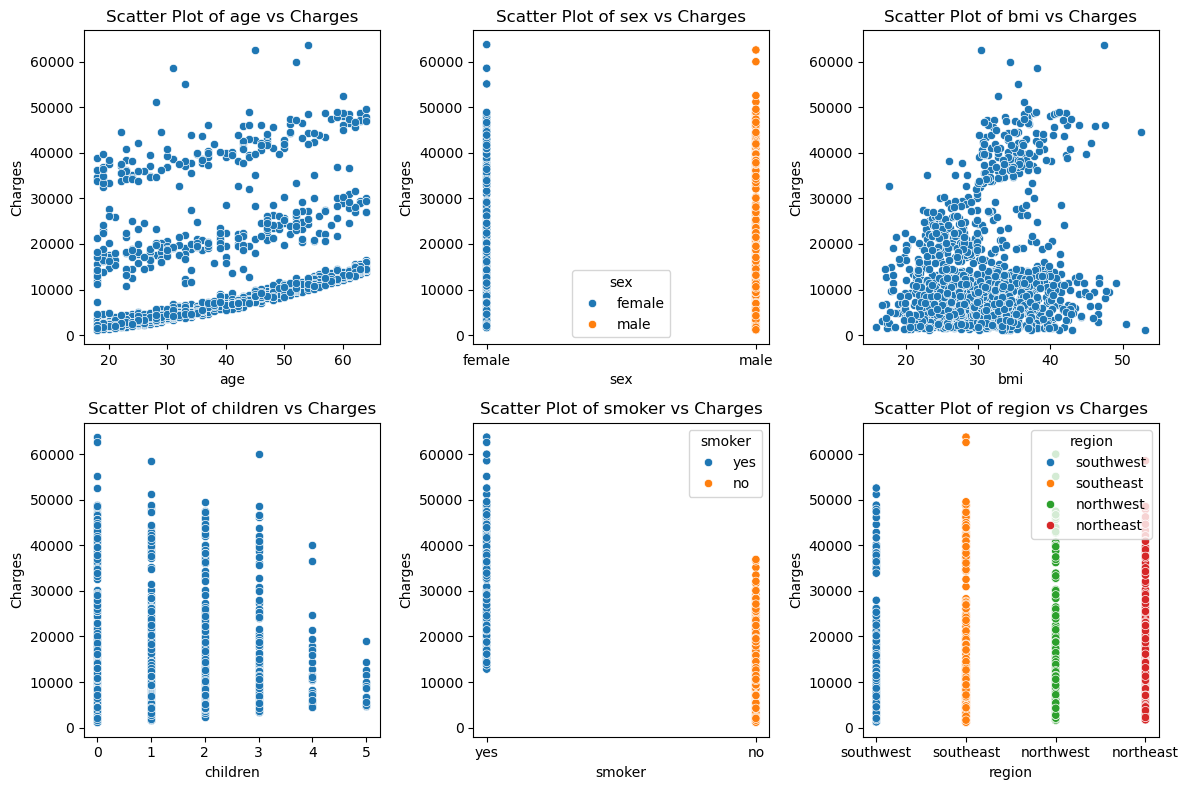

In [4]:
# for var in X.columns.tolist():
#     plt.figure(figsize=(4, 2))
#     if X[var].dtype == 'object':  # Check if the variable is categorical
#         sns.scatterplot(x=var, y=Y, data=df, hue=var)
#     else:
#         sns.scatterplot(x=X[var], y=Y)
#     plt.title(f'Scatter Plot of {var} vs Charges')
#     plt.xlabel(var)
#     plt.ylabel('Charges')
#     plt.show()

# Determine the number of columns and rows
num_cols = 3
num_plots = len(X.columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # This ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, var in enumerate(X.columns):
    ax = axes[i]
    if X[var].dtype == 'object':  # Check if the variable is categorical
        sns.scatterplot(x=var, y=Y, data=df, hue=var, ax=ax)
    else:
        sns.scatterplot(x=X[var], y=Y, ax=ax)
    ax.set_title(f'Scatter Plot of {var} vs Charges')
    ax.set_xlabel(var)
    ax.set_ylabel('Charges')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 1] = label_encoder.fit_transform(X.iloc[:, 1])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,yes,southwest
1,18,1,33.770,1,no,southeast
2,28,1,33.000,3,no,southeast
3,33,1,22.705,0,no,northwest
4,32,1,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest
1334,18,0,31.920,0,no,northeast
1335,18,0,36.850,0,no,southeast
1336,21,0,25.800,0,no,southwest


In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 4] = label_encoder.fit_transform(X.iloc[:, 4])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest
1334,18,0,31.920,0,0,northeast
1335,18,0,36.850,0,0,southeast
1336,21,0,25.800,0,0,southwest


In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 5] = label_encoder.fit_transform(X.iloc[:, 5])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Argument should be categorial data feild


# Country column
# Assuming X is your dataset
# Define the ColumnTransformer with OneHotEncoder for the first column (index 0)
ct = ColumnTransformer(
    transformers=[
        ('Country', OneHotEncoder(drop='first'), [5])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 27.9, 0, 1],
       [0.0, 1.0, 0.0, ..., 33.77, 1, 0],
       [0.0, 1.0, 0.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 1.0, 0.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 1.0, ..., 25.8, 0, 0],
       [1.0, 0.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# from sklearn.preprocessing import MinMaxScaler
# 
# # ...
# 
# # Normalize data using MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize Neural Network
regressor = Sequential()

# Input layer
regressor.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=8))

regressor.add(Dense(units=16, kernel_initializer='uniform', activation='linear'))

regressor.add(Dense(units=32, kernel_initializer='uniform', activation='linear'))


# Output layer (regression)
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train ANN
regressor.fit(X_train, Y_train, batch_size=5, epochs=300)

Epoch 1/300
214/214 [==============================] - 1s 4ms/step - loss: 316989120.0000 - mse: 316989120.0000
Epoch 2/300
214/214 [==============================] - 1s 5ms/step - loss: 292106176.0000 - mse: 292106176.0000
Epoch 3/300
214/214 [==============================] - 1s 3ms/step - loss: 174426544.0000 - mse: 174426544.0000
Epoch 4/300
214/214 [==============================] - 1s 3ms/step - loss: 64399952.0000 - mse: 64399952.0000
Epoch 5/300
214/214 [==============================] - 1s 4ms/step - loss: 40796136.0000 - mse: 40796136.0000
Epoch 6/300
214/214 [==============================] - 1s 3ms/step - loss: 37675580.0000 - mse: 37675580.0000
Epoch 7/300
214/214 [==============================] - 0s 2ms/step - loss: 37022888.0000 - mse: 37022888.0000
Epoch 8/300
214/214 [==============================] - 1s 3ms/step - loss: 36924900.0000 - mse: 36924900.0000
Epoch 9/300
214/214 [==============================] - 1s 3ms/step - loss: 36845952.0000 - mse: 36845952.0000
Epoc

In [89]:
# Predicting the test set results
Y_pred = regressor.predict(X_test)

9/9 [==============================] - 0s 2ms/step


# Accuracy Check

In [90]:

# Evaluating the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute R-Squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-Squared (R2) score:", r2)

Mean Squared Error (MSE): 18597738.849127952
Mean Absolute Error (MAE): 2773.149318011369
R-Squared (R2) score: 0.8831286165236394
